In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from PIL import Image
from pprint import pprint
from IPython.display import SVG, display

from markushgenerator.image_generation.generation import generate_svg_image
from markushgenerator.image_generation.scripts import generate_hf_dataset_ocr_boxes 
from markushgenerator.text_generation.scripts import generate_page_dataset 
from markushgenerator.text_generation.text_generation import DescriptionGenerator
from markushgenerator.text_generation.text_augmentation import DescriptionAugmentator
from markushgenerator.text_generation.image_text_merging import ImageTextMerger
from markushgenerator.cxsmiles_tokenizer import CXSMILESTokenizer

/mnt/volume/lum/MarkushGenerator-IBM/markushgenerator-env/lib/python3.10/site-packages/transformers/utils/hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


### Draw molecule

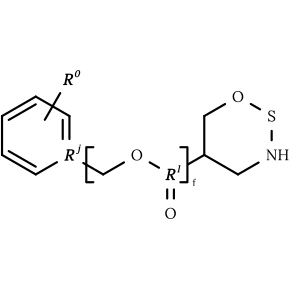

In [3]:
cxsmiles = "[1*]C.O=[2*](OC[3*]1ccccc1)C1CNSOC1 |$R0;;;Rl;;;Rj;;;;;;;;;;;$,Sg:n:2,3,4,5:F:ht,m:1:6.7.8.9.10.11|"
id = "1"
dataset_name = "test"

# Generate
success = generate_svg_image(cxsmiles, id, dataset_name)

# Display
display(SVG(filename=os.getcwd() + f"/../data/dataset/{dataset_name}/images/{id}.svg"))

### Generate sample

In [4]:
image_pil_path = "test_image.png"
svg_path = os.getcwd() + f"/../data/dataset/{dataset_name}/images/{id}.svg"
molfile_path = os.getcwd() + f"/../data/dataset/{dataset_name}/molfiles/{id}.mol"
cxsmiles_tokenizer = CXSMILESTokenizer()

# Generate
sample = generate_hf_dataset_ocr_boxes.generate_sample(
    cxsmiles, id, svg_path, image_pil_path, molfile_path, cxsmiles_tokenizer
)

# Display
pprint(sample)

{'cells': [{'bbox': [0.9226297577854677,
                     0.5173356401384082,
                     0.998062283737024,
                     0.5550865051903114],
            'text': 'N'},
           {'bbox': [0.2224913494809688,
                     0.4998269896193772,
                     0.2796238904769069,
                     0.5560207612456748],
            'text': 'Rj'},
           {'bbox': [0.45498269896193777,
                     0.5169204152249136,
                     0.49207612456747407,
                     0.5555017301038062],
            'text': 'O'},
           {'bbox': [0.804878892733564,
                     0.31491349480968855,
                     0.8419723183391005,
                     0.3534948096885813],
            'text': 'O'},
           {'bbox': [0.9278546712802765,
                     0.3822837370242214,
                     0.9523529411764707,
                     0.4208304498269896],
            'text': 'S'},
           {'bbox': [0.5716262975778548,
  

### Generate textual description

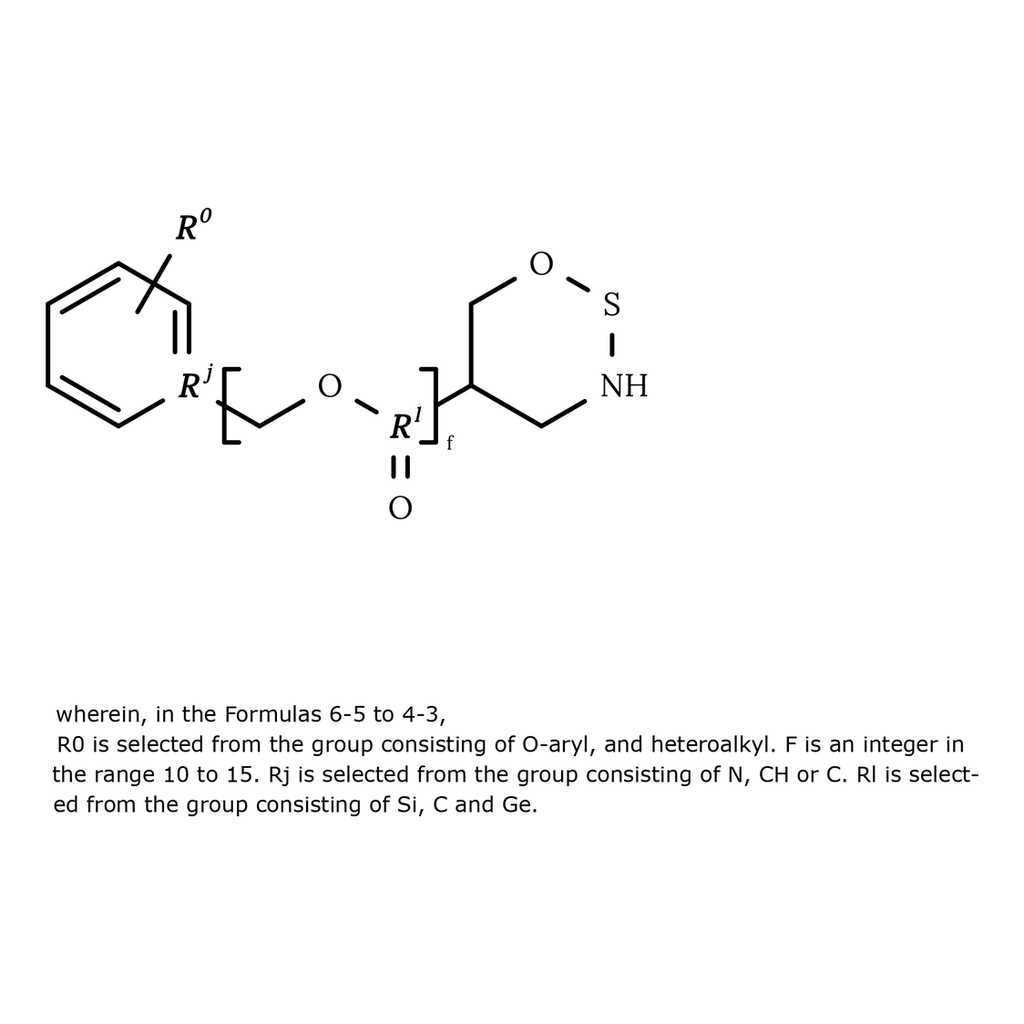

In [5]:
id = 1
mol = sample["mol"]
cxsmiles_dataset = sample["cxsmiles_dataset"]
cxsmiles = sample["cxsmiles"]
cxsmiles_opt = sample["cxsmiles_opt"]
keypoints = sample["keypoints"]
image = Image.open(sample["image_path"])
cells = sample["cells"]
page_image_path = "test_page.png"
description_generator = DescriptionGenerator()
image_text_merger = ImageTextMerger()

# Without LLM-paraphrasing
description_augmentation = None
do_augment = False

# With LLM-paraphrasing 
# description_augmentation = DescriptionAugmentator()
# do_augment = True

# Generate
generate_page_dataset.generate_sample(
    id, mol, cxsmiles_dataset, cxsmiles, 
    cxsmiles_opt, keypoints, image, cells, 
    page_image_path, description_generator, 
    image_text_merger, description_augmentation,
    do_augment=do_augment, verbose=False
)

# Display
Image.open("test_page.png")